# Критерии дисперсионного анализа в R (часть 2)

In [1]:
options(repr.plot.width=5, repr.plot.height=4)

### boxplot

Параметры

* `formula` -- формула в виде `y ~ grp`, где `y` -- числовой признак, а `grp` -- фактор с несколькими уровнями (категориальная переменная). Выборки получаются разделением числового признака по значению фактора;
* `data` -- данные (матрица или таблица);
* `na.action` -- функция, указывающая что делать с пропусками в данных.
* `x` -- данные, по которым строить ящики. Передаются в виде списка выборок, либо несколькими параметрами, на что указывает `...`;
* `width` -- вектор, задающий ширину каждого ящика;
* `boxwex` -- коэффициент масштаба ширины ящика;
* `at` -- положения ящиков по оси икс.

Возвращают:
* `stats` -- характеристики каждого ящика (нижний ус, нижняя граница ящика, медиана, верхняя граница ящика, верхний ус);
* `out` -- точки за пределами усов;
* `group` -- группы, соответствующие точкам из `out`.

Примеры:

Встроенные в R данные о росте зубов морских свинок. Признак `len` отвечает за длину зубов, `supp` -- тип питания, `dose` -- доза.

In [2]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


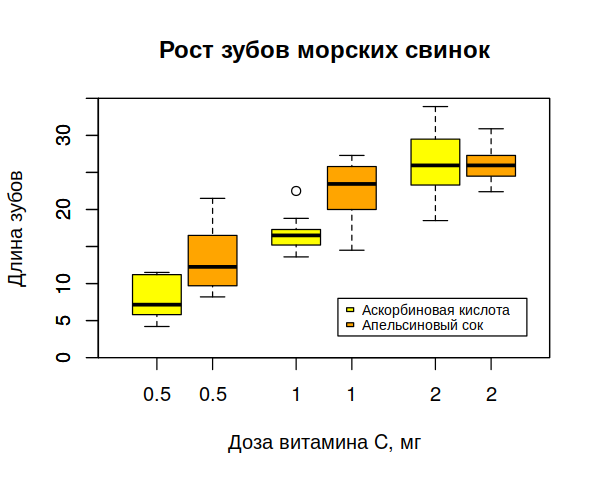

In [3]:
# желтые ящики
boxplot(len ~ dose, data = ToothGrowth,
        boxwex = 0.35, at = 1:3 - 0.2,  # положение и размер
        subset = supp == "VC", col = "yellow",
        main = "Рост зубов морских свинок",
        xlab = "Доза витамина C, мг",
        ylab = "Длина зубов",
        xlim = c(0.5, 3.5), ylim = c(0, 35), yaxs = "i")

# оранжевые ящики
boxplot(len ~ dose, data = ToothGrowth, 
        add = TRUE,  # добавить к предыдущей фигуре
        boxwex = 0.35, at = 1:3 + 0.2,
        subset = supp == "OJ", col = "orange")

# легенда
legend(2.1, 8, c("Аскорбиновая кислота", "Апельсиновый сок"),
       fill = c("yellow", "orange"), 
       cex = 0.7,  # размер тексте
       y.intersp = 2,  # расстояние между строками
       text.width = 1.15)  # длина рамки

# Нормальные данные

### Критерий Бартлетта

$X_{ij} \sim \mathcal{N}(\mu_j, \sigma_j^2),\ \ i=1,...,n_j,\ \ j=1,...,k$

$\mathsf{H}_0\colon \sigma_1 = ... = \sigma_k$

Параметры

* - `x` -- список выборок, то есть `list(x1, x2, ...)`;

    или
    
* - `x` --- выборка;
* - `g` -- фактор с несколькими уровнями (категориальная переменная). Выборки получаются разделением числового признака по значению фактора;
* `formula` -- формула в виде `lhs ~ rhs`, где `lhs` -- числовой признак, а `rhs` -- фактор с несколькими уровнями (категориальная переменная). Выборки получаются разделением числового признака по значению фактора;
* `data` -- данные (матрица или таблица);
* `na.action` -- функция, указывающая что делать с пропусками в данных.

Возвращают:
* `statistic` -- статистика критерия;
* `parameter` -- число степеней свободы распределения хи-квадрат, которым аппроксимируется статистика;
* `p.value` -- p-value критерия.

Примеры:

Встроенные в R данные о количестве насекомых после обработки спреем. Признак `count` отвечает за количество насекомых, `supp` -- тип спрея.

In [4]:
head(InsectSprays)

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


Построим ящики с усами

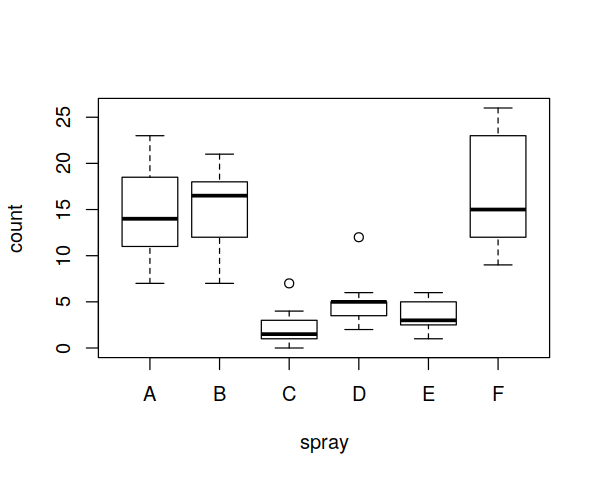

In [5]:
plot(count ~ spray, data = InsectSprays)

Далее два эквивалентных способа применить критерий Бартлетта к данным

*Напечатанные числа*: статистика критерия, число степеней свободы предельного распределения хи-квадрат, p-value критерия.

In [6]:
bartlett.test(InsectSprays$count, InsectSprays$spray)


	Bartlett test of homogeneity of variances

data:  InsectSprays$count and InsectSprays$spray
Bartlett's K-squared = 25.96, df = 5, p-value = 9.085e-05


In [7]:
bartlett.test(count ~ spray, data = InsectSprays)


	Bartlett test of homogeneity of variances

data:  count by spray
Bartlett's K-squared = 25.96, df = 5, p-value = 9.085e-05


### ANOVA (ANalysis Of VAriance, критерий Фишера)

Полный список моделей:
https://www.rdocumentation.org/packages/car/versions/3.0-2/topics/Anova

Базовый вариант:

Параметры

* `formula` -- формула;
* `data` -- данные (матрица или таблица).

Примеры:

Возьмем данные `npk` о выращивании гороха на 6 блоках, на который производится воздействие тремя факторами: `N` (азот), `P` (фосфат), `K` (калий). Величина `yield` отвечает за урожайность гороха в фунтах на участок.

In [8]:
head(npk)

block,N,P,K,yield
1,0,1,1,49.5
1,1,1,0,62.8
1,0,0,0,46.8
1,1,0,1,57.0
2,1,0,0,59.8
2,1,1,1,58.5


Изучим влияние факторов многофакторного дисперсионного анализа, включая совместное влияние факторов `N` и `P`.

In [9]:
aov(yield ~ block + N * P + K, npk)

Call:
   aov(formula = yield ~ block + N * P + K, data = npk)

Terms:
                   block        N        P        K      N:P Residuals
Sum of Squares  343.2950 189.2817   8.4017  95.2017  21.2817  218.9033
Deg. of Freedom        5        1        1        1        1        14

Residual standard error: 3.954232
Estimated effects may be unbalanced

Результат можно оформить в виде таблицы. Колонки соответствуют:
* число степеней свободы критерия Фишера;
* суммарная изменчивость данных между уровнями данного фактора;
* средняя изменчивость данных между уровнями данного фактора;
* значение статистики критерия Фишера для гипотезы о незначимости фактора;
* соответствующее p-value.

Последняя строка соответствует остаткам модели.

In [10]:
summary(aov(yield ~ block + N * P + K, npk))

            Df Sum Sq Mean Sq F value  Pr(>F)   
block        5  343.3   68.66   4.391 0.01295 * 
N            1  189.3  189.28  12.106 0.00368 **
P            1    8.4    8.40   0.537 0.47564   
K            1   95.2   95.20   6.089 0.02711 * 
N:P          1   21.3   21.28   1.361 0.26284   
Residuals   14  218.9   15.64                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Compute Tukey Honest Significant Differences

Параметры

* `x` -- обученная anova-модель;
* `which` -- вектор параметров, которые надо проанализоровать;
* `ordered` -- упорядочены ли уровни фактора по предполагаемому увеличению среднего в выборке до принятия различий. Если ordered имеет значение true, то.

Набор данных `warpbreaks` о количестве разрывов на ткацкий станок, причем ткацкому станку соответствует фиксированная длина пряжи. Колонка `wool` отвечает за тип шерсти (`A` или `B`), а `tension` за степень натяжения (`L`, `M`, `H`). Проверено 9 ткацких станков на 6 типах деформации (`AL`, `AM`, `AH`, `BL`, `BM`, `BH`).

In [11]:
head(warpbreaks)

breaks,wool,tension
26,A,L
30,A,L
54,A,L
25,A,L
70,A,L
52,A,L


Уровни фактора `tension`.

In [12]:
unique(warpbreaks$tension)

[1] L M H
Levels: L M H

Посмотрим с помощью boxplot, как он влияет на количество разрывов

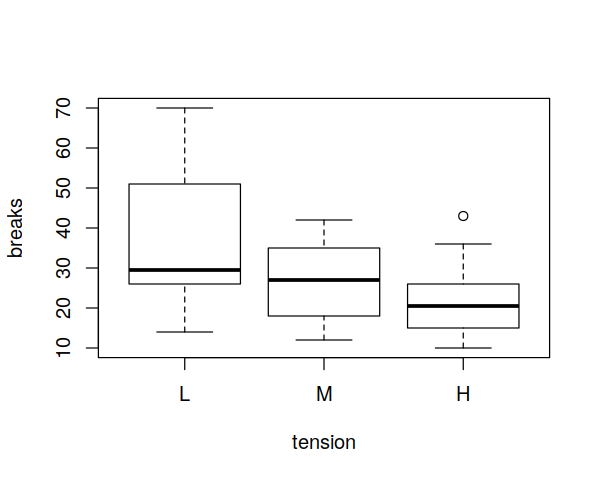

In [13]:
plot(breaks ~ tension, data = warpbreaks)

Построим anova-модель

In [14]:
summary(fm1 <- aov(breaks ~ wool + tension, data = warpbreaks))

            Df Sum Sq Mean Sq F value  Pr(>F)   
wool         1    451   450.7   3.339 0.07361 . 
tension      2   2034  1017.1   7.537 0.00138 **
Residuals   50   6748   135.0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Теперь по этой модели применим post hoc анализ методом Тьюки для анализа влияния фактора `tension`, который отвечает за степень натяжения. Предполагаем, что среднее число разрывов возрастает при увеличении степени натяжения, поэтому рассматриваем альтернативу с возрастающими средними, за что ответчает параметр `ordered`.

Таблица для каждой пары групп содержит следующие значения: оценка контраста `diff`, границы доверительного интервала (`lwr` и `upr`), подправленное (после МПГ) значение p-value `p adj`. Например, первая клетка таблицы означает, что в группе `M` в среднем происходит на 4.72 разрыва больше, чем в группе `H`. Соответствующий доверительный интервал равен (-4.63 14.08). Поскольку подправленное p-value больше 0.05, то такая разница незначима, что согласуется с тем, что доверительный интервал содержит ноль.

In [15]:
TukeyHSD(fm1, "tension", ordered = TRUE)

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = breaks ~ wool + tension, data = warpbreaks)

$tension
         diff        lwr      upr     p adj
M-H  4.722222 -4.6311985 14.07564 0.4474210
L-H 14.722222  5.3688015 24.07564 0.0011218
L-M 10.000000  0.6465793 19.35342 0.0336262


Визуализация результата. На графике для каждой группы указаны оценка контраста и доверительный интервал для него.

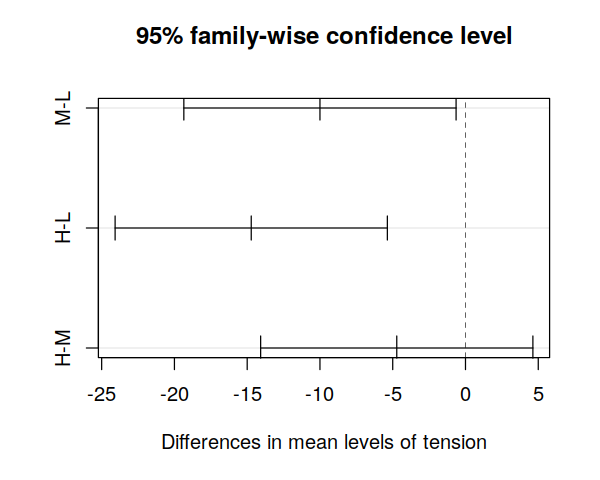

In [16]:
plot(TukeyHSD(fm1, "tension"))

### LSD Фишера
См. документацию https://www.rdocumentation.org/packages/agricolae/versions/1.3-0/topics/LSD.test

# Независимые выборки, непараметрический случай

### Критерий Краскела Уоллиса

$X_{ij},\ \ i=1,...,n_j,\ \ j=1,...,k$ --- однофакторная модель, случай независмых выборок

$\mathsf{H}_0\colon \mu_1 = ... = \mu_k$

$\mathsf{H}_1\colon \exists i, j \text{ т.ч. } \mu_i \not= \mu_j$

Параметры

* - `x` -- список выборок, то есть `list(x1, x2, ...)`;

    или
    
* - `x` --- выборка;
* - `g` -- фактор с несколькими уровнями (категориальная переменная). Выборки получаются разделением числового признака по значению фактора;
* `formula` -- формула в виде `response ~ group`, где `response` -- числовой признак, а `group` -- фактор с несколькими уровнями (категориальная переменная). Выборки получаются разделением числового признака по значению фактора;
* `data` -- данные (матрица или таблица);
* `na.action` -- функция, указывающая что делать с пропусками в данных.

Возвращают:
* `statistic` -- статистика критерия;
* `parameter` -- число степеней свободы распределения хи-квадрат;
* `p.value` -- p-value критерия.

Примеры:

*Напечатанные числа*: статистика критерия, число степеней свободы предельного распределения хи-квадрат, p-value критерия.

In [17]:
x <- c(2.9, 3.0, 2.5, 2.6, 3.2) # normal subjects
y <- c(3.8, 2.7, 4.0, 2.4)      # with obstructive airway disease
z <- c(2.8, 3.4, 3.7, 2.2, 2.0) # with asbestosis
kruskal.test(list(x, y, z))


	Kruskal-Wallis rank sum test

data:  list(x, y, z)
Kruskal-Wallis chi-squared = 0.77143, df = 2, p-value = 0.68


Встроенные в R данные о качестве воздуха

In [18]:
head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


Зависимость уровня озона от месяца


	Kruskal-Wallis rank sum test

data:  Ozone by Month
Kruskal-Wallis chi-squared = 29.267, df = 4, p-value = 6.901e-06


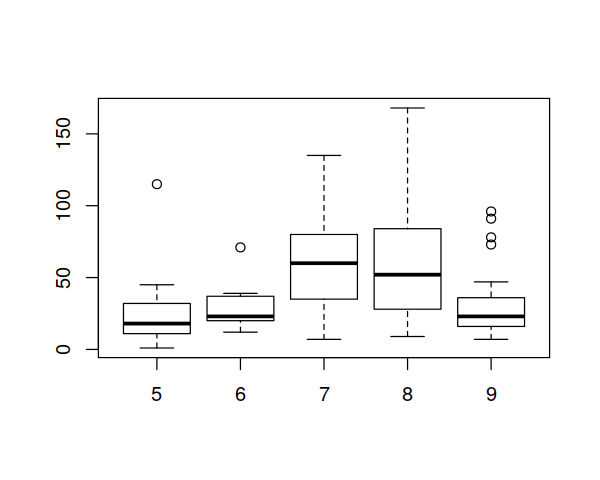

In [19]:
boxplot(Ozone ~ Month, data = airquality)
kruskal.test(Ozone ~ Month, data = airquality)

### Post-hoc анализ методом Данна

Сначала надо поставить пакет `dunn.test`

In [20]:
# install.packages('dunn.test')
library(dunn.test)

Параметры

* - `x` -- список выборок, то есть `list(x1, x2, ...)`;

    или
    
* - `x` --- выборка;
* - `g` -- фактор с несколькими уровнями (категориальная переменная). Выборки получаются разделением числового признака по значению фактора;
* `method` -- метод множественной проверки гипотез из списка выше;
* `kw` -- применять ли критерий Краскела-Уоллиса;
* `label` -- использовать ли метки факторов в таблице;
* `table` и `list` -- формат, в котором печатать результат;
* `rmc` -- если указано, то таблица содержит оценки для "строка минус столбец", иначе (по умолчанию) для "столбец минус строка";
* `alpha` -- уровень значимости.

Возвращают:
* `chi2` -- статистика критерия Красела-Уоллиса;
* `Z` -- вектор из $m = k(k-1)/2$ статистик Данна, где $k$ -- количество групп;
* `P` -- соответсвующий вектор p-value;
* `P.adjust` -- соответсвующий подправленный (МПГ) вектор p-value;
* `comparisons` -- вектор строк о попарном сравнении.

Примеры:

*В каждой ячейке печатается два числа:* оценка контраста, p-value критерия. Например, значение -0.64 в первой клетке таблицы означает, что среднее в группе 1 минус среднее в группе 2 оценивается как -0.64. Число 0.52 есть p-value гипотезы о незначимости различий средних в этих двух группах.

In [21]:
x <- c(2.9, 3.0, 2.5, 2.6, 3.2) # normal subjects
y <- c(3.8, 2.7, 4.0, 2.4)      # with obstructive airway disease
z <- c(2.8, 3.4, 3.7, 2.2, 2.0) # with asbestosis
dunn.test(x = list(x,y,z), method = 'holm')

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 0.7714, df = 2, p-value = 0.68


                           Comparison of x by group                            
                                    (Holm)                                     
Col Mean-|
Row Mean |          1          2
---------+----------------------
       2 |  -0.641426
         |     0.5212
         |
       3 |   0.226778   0.855235
         |     0.4103     0.5886

alpha = 0.05
Reject Ho if p <= alpha/2


Встроенные в R данные о качестве воздуха

In [22]:
head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


Посмотрим на зависимость уровня озона от месяца. На этот раз критерий Краскела-Уоллиса применять не будем -- он уже был применен ранее для этих данных.

In [23]:
dunn.test(airquality$Ozone, airquality$Month, kw=FALSE, method="bonferroni")


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          5          6          7          8
---------+--------------------------------------------
       6 |  -0.925158
         |     1.0000
         |
       7 |  -4.419470  -2.244208
         |    0.0000*     0.1241
         |
       8 |  -4.132813  -2.038635   0.286657
         |    0.0002*     0.2074     1.0000
         |
       9 |  -1.321202   0.002538   3.217199   2.922827
         |     0.9322     1.0000    0.0065*    0.0173*

alpha = 0.05
Reject Ho if p <= alpha/2


### Post-hoc анализ с помощью пакета `PMCMR`

Полная документация с формулами https://cran.r-project.org/web/packages/PMCMR/vignettes/PMCMR.pdf

Для post-hoc анализа после критерия Краскела-Уоллиса реализовано:
* `posthoc.kruskal.nemenyi.test`
* `posthoc.kruskal.dunn.test`
* `posthoc.kruskal.conover.test`

Разберем интерфейс первого. Остальные работают аналогично.

In [24]:
# install.packages('PMCMR')
library('PMCMR')

PMCMR is superseded by PMCMRplus and will be no longer maintained. You may wish to install PMCMRplus instead.


Параметры

* - `x` -- список выборок, то есть `list(x1, x2, ...)`;

    или
    
* - `x` --- выборка;
* - `g` -- фактор с несколькими уровнями (категориальная переменная). Выборки получаются разделением числового признака по значению фактора;
* `formula` -- формула в виде `response ~ group`, где `response` -- числовой признак, а `group` -- фактор с несколькими уровнями (категориальная переменная). Выборки получаются разделением числового признака по значению фактора;
* `data` -- данные (матрица или таблица);
* `na.action` -- функция, указывающая что делать с пропусками в данных;
* `dist` -- метод вычисления p-value.

Возвращают:
* `statistic` -- статистика;
* `p.value` -- p-value.

Примеры:

Два эквивалентных способа применения критерия по датасету `airquality`, рассмотренному ранее.

In [25]:
posthoc.kruskal.nemenyi.test(airquality$Ozone, airquality$Month)

Warning message in posthoc.kruskal.nemenyi.test.default(airquality$Ozone, airquality$Month):
“Ties are present, p-values are not corrected.”


	Pairwise comparisons using Tukey and Kramer (Nemenyi) test	
                   with Tukey-Dist approximation for independent samples 

data:  airquality$Ozone and airquality$Month 

  5       6       7       8      
6 0.88737 -       -       -      
7 9.7e-05 0.16373 -       -      
8 0.00035 0.24773 0.99853 -      
9 0.67819 1.00000 0.01136 0.02867

P value adjustment method: none 

In [26]:
posthoc.kruskal.nemenyi.test(Ozone ~ Month, data = airquality)

Warning message in posthoc.kruskal.nemenyi.test.default(c(41L, 36L, 12L, 18L, 28L, :
“Ties are present, p-values are not corrected.”


	Pairwise comparisons using Tukey and Kramer (Nemenyi) test	
                   with Tukey-Dist approximation for independent samples 

data:  Ozone by Month 

  5       6       7       8      
6 0.88737 -       -       -      
7 9.7e-05 0.16373 -       -      
8 0.00035 0.24773 0.99853 -      
9 0.67819 1.00000 0.01136 0.02867

P value adjustment method: none 

В таблицах выше напечатаны p-value. Оценки контраста по модулю можно получить так:

In [27]:
posthoc.kruskal.nemenyi.test(Ozone ~ Month, data = airquality)$statistic

Warning message in posthoc.kruskal.nemenyi.test.default(c(41L, 36L, 12L, 18L, 28L, :
“Ties are present, p-values are not corrected.”

,5,6,7,8
6,1.308037,NA,NA,NA
7,6.248477,3.172977980,NA,NA
8,5.843186,2.882328830,0.4052909,NA
9,1.867984,0.003589141,4.5486434,4.132446


**Замечание.** Так же в пакете `PMCMR` реализован критерий Ван-дер-Вардена `vanWaerden.test`, альтренативный критерию Краскела-Уоллиса, а так же соответствующий критерий post-hoc анализа `posthoc.vanWaerden.test`.

### Критерий Джонкхиера

$X_{ij},\ \ i=1,...,n_j,\ \ j=1,...,k$ --- однофакторная модель, случай независмых выборок

$\mathsf{H}_0\colon \mu_1 = ... = \mu_k$

$\mathsf{H}_1\colon \mu_1 \leqslant ... \leqslant \mu_k$

In [28]:
# install.packages('clinfun')
library('clinfun')


Attaching package: ‘clinfun’

The following object is masked from ‘package:PMCMR’:

    jonckheere.test



Параметры
* `x` --- выборка;
* `g` -- фактор с несколькими уровнями (категориальная переменная). Выборки получаются разделением числового признака по значению фактора;
* `alternative` -- вид альтернативы:
    * `two.sided` -- монотонность $\mathsf{H}_1\colon (\mu_1 \leqslant ... \leqslant \mu_k \text{ или } \mu_1 \geqslant ... \geqslant \mu_k)$;
    * `increasing` -- возрастание $\mathsf{H}_1\colon \mu_1 \leqslant ... \leqslant \mu_k$;
    * `decreasing` -- убывание $\mathsf{H}_1\colon \mu_1 \geqslant ... \geqslant \mu_k$;
* `nperm` -- количество перестановок.

Примеры:

*Напечатанные числа:* значение статистики, p-value.

In [29]:
g <- rep(1:5, rep(10,5))  # фактор
x <- rnorm(50)  # выборка
jonckheere.test(x+0.3*g, g)


	Jonckheere-Terpstra test

data:  
JT = 710, p-value = 0.0002524
alternative hypothesis: two.sided


# Связные выборки, непараметрический случай

### Критерий Фридмана

$X_{ij},\ \ i=1,...,n,\ \ j=1,...,k$ --- однофакторная модель, случай связных выборок

$\mathsf{H}_0\colon \beta_1 = ... = \beta_k$

$\mathsf{H}_1\colon \exists i, j \text{ т.ч. } \beta_i \not= \beta_j$

Параметры

* - `y` -- выборки в виде матрицы;

    или
    
* - `x` --- выборка;
* - `groups` -- интересующий фактор с несколькими уровнями (категориальная переменная), задает выборки;
* - `blocks` -- мешающий фактор с несколькими уровнями (категориальная переменная), задает строки;
* `formula` -- формула вида `a ~ b | c`, где `a`, `b` и `c` задают данные, интересующий фактор и мешающий фактор (блоки) соответственно;
* `data` -- данные (матрица или таблица);
* `na.action` -- функция, указывающая что делать с пропусками в данных..

Возвращают:
* `statistic` -- статистика критерия;
* `parameter` -- число степеней свободы распределения хи-квадрат;
* `p.value` -- p-value критерия.

Примеры:

*Напечатанные числа*: значение статистики критерия, число степеней свободы распределения хи-квадрат, p-value критерия.

In [30]:
samples <-
matrix(c(5.40, 5.50, 5.55,
         5.85, 5.70, 5.75,
         5.20, 5.60, 5.50,
         5.55, 5.50, 5.40,
         5.45, 5.55, 5.50,
         5.55, 5.55, 5.35,
         5.45, 5.50, 5.55,
         5.50, 5.45, 5.25,
         5.65, 5.60, 5.40,
         5.70, 5.65, 5.55,
         6.30, 6.30, 6.25),
       nrow = 11,
       byrow = TRUE)
friedman.test(samples)


	Friedman rank sum test

data:  samples
Friedman chi-squared = 2.2857, df = 2, p-value = 0.3189


Набор данных `warpbreaks` о количестве разрывов на ткацкий станок, причем ткацкому станку соответствует фиксированная длина пряжи. Колонка `wool` отвечает за тип шерсти (`A` или `B`), а `tension` за степень натяжжения (`L`, `M`, `H`). Проверено 9 ткацких станков на 6 типах деформации (`AL`, `AM`, `AH`, `BL`, `BM`, `BH`).

In [31]:
head(warpbreaks)

breaks,wool,tension
26,A,L
30,A,L
54,A,L
25,A,L
70,A,L
52,A,L


Усредним данные по станкам для каждого типа деформации

In [32]:
wb <- aggregate(warpbreaks$breaks,
                by = list(w = warpbreaks$wool,
                          t = warpbreaks$tension),
                FUN = mean)

wb

w,t,x
A,L,44.55556
B,L,28.22222
A,M,24.00000
B,M,28.77778
A,H,24.55556
B,H,18.77778


Исследуем, влияет ли тип шерсти на количество разрывов. В данном случае тип шерсти -- интересующий фактор, а степень натяжения -- мешающий.

Первый способ:

In [33]:
friedman.test(wb$x, wb$w, wb$t)


	Friedman rank sum test

data:  wb$x, wb$w and wb$t
Friedman chi-squared = 0.33333, df = 1, p-value = 0.5637


Второй способ:

In [34]:
friedman.test(x ~ w | t, data = wb)


	Friedman rank sum test

data:  x and w and t
Friedman chi-squared = 0.33333, df = 1, p-value = 0.5637


### Post-hoc анализ с помощью пакета `PMCMR`

Полная документация с формулами https://cran.r-project.org/web/packages/PMCMR/vignettes/PMCMR.pdf

Для post-hoc анализа после критерия Фридмана реализовано:
* `posthoc.friedman.nemenyi.test`
* `posthoc.friedman.conover.test`

Разберем интерфейс первого. Второй работает аналогично.

Параметры

* - `y` -- выборки в виде матрицы;

    или
    
* - `x` --- выборка;
* - `groups` -- интересующий фактор с несколькими уровнями (категориальная переменная), задает выборки;
* - `blocks` -- мешающий фактор с несколькими уровнями (категориальная переменная), задает строки;
* `formula` -- формула вида `a ~ b | c`, где `a`, `b` и `c` задают данные, интересующий фактор и мешающий фактор (блоки) соответственно;
* `data` -- данные (матрица или таблица);
* `na.action` -- функция, указывающая что делать с пропусками в данных..

Возвращают:
* `statistic` -- статистика;
* `p.value` -- p-value.

Примеры:

Создадим данные

In [35]:
y <- matrix(c(
    3.88, 5.64, 5.76, 4.25, 5.91, 4.33, 30.58, 30.14, 16.92,
    23.19, 26.74, 10.91, 25.24, 33.52, 25.45, 18.85, 20.45, 
    26.67, 4.44, 7.94, 4.04, 4.4, 4.23, 4.36, 29.41, 30.72,
    32.92, 28.23, 23.35, 12, 38.87, 33.12, 39.15, 28.06, 38.23,
    26.65),nrow=6, ncol=6, 
dimnames=list(1:6,c("A","B","C","D","E","F")))
y

A,B,C,D,E,F
3.88,30.58,25.24,4.44,29.41,38.87
5.64,30.14,33.52,7.94,30.72,33.12
5.76,16.92,25.45,4.04,32.92,39.15
4.25,23.19,18.85,4.40,28.23,28.06
5.91,26.74,20.45,4.23,23.35,38.23
4.33,10.91,26.67,4.36,12.00,26.65


Применяем критерий Фридмана

In [36]:
friedman.test(y)


	Friedman rank sum test

data:  y
Friedman chi-squared = 23.333, df = 5, p-value = 0.0002915


Поскольку критерий Фридмана отвергает основную гипотезу, переходим к post-hoc анализу

In [37]:
posthoc.friedman.nemenyi.test(y)


	Pairwise comparisons using Nemenyi multiple comparison test	
             with q approximation for unreplicated blocked data 

data:  y 

  A      B      C      D      E     
B 0.1880 -      -      -      -     
C 0.0917 0.9996 -      -      -     
D 0.9996 0.3388 0.1880 -      -     
E 0.0395 0.9898 0.9996 0.0917 -     
F 0.0016 0.6363 0.8200 0.0052 0.9400

P value adjustment method: none 

В таблицах выше напечатаны p-value. Оценки контраста по модулю можно получить так:

In [38]:
posthoc.friedman.nemenyi.test(y)$statistic

,A,B,C,D,E
B,3.2732684,NA,NA,NA,NA
C,3.7097041,0.4364358,NA,NA,NA
D,0.4364358,2.8368326,3.2732684,NA,NA
E,4.1461399,0.8728716,0.4364358,3.709704,NA
F,5.4554473,2.1821789,1.7457431,5.019011,1.309307


**Замечание.** Так же в пакете `PMCMR` реализован критерий `quade.test`, альтренативный критерию Фридмана, а так же соответствующий критерий post-hoc анализа `posthoc.quade.test`.

### Критерий Пейджа

$X_{ij},\ \ i=1,...,n,\ \ j=1,...,k$ --- однофакторная модель, случай связных выборок

$\mathsf{H}_0\colon \beta_1 = ... = \beta_k$

$\mathsf{H}_1\colon \beta_1 \leqslant ... \leqslant \beta_k$

In [39]:
# install.packages('DescTools')
library('DescTools')

*Все аналогично критерию Фридмана, но предполагается, что значения факторы упорядочены по предполагаемому увеличению воздействия.*

Параметры

* - `y` -- выборки в виде матрицы;

    или
    
* - `x` --- выборка;
* - `groups` -- интересующий фактор с несколькими уровнями (категориальная переменная), задает выборки;
* - `blocks` -- мешающий фактор с несколькими уровнями (категориальная переменная), задает строки;
* `formula` -- формула вида `a ~ b | c`, где `a`, `b` и `c` задают данные, интересующий фактор и мешающий фактор (блоки) соответственно;
* `data` -- данные (матрица или таблица);
* `na.action` -- функция, указывающая что делать с пропусками в данных..

Возвращают:
* `statistic` -- статистика критерия;
* `parameter` -- число степеней свободы распределения хи-квадрат;
* `p.value` -- p-value критерия.

Примеры:

*Напечатанные числа*: значение статистики критерия, p-value.

In [40]:
# Craig's data from Siegel & Castellan, p 186
soa.mat <- matrix(c(.797,.873,.888,.923,.942,.956,
 .794,.772,.908,.982,.946,.913,
 .838,.801,.853,.951,.883,.837,
 .815,.801,.747,.859,.887,.902), nrow=4, byrow=TRUE)
PageTest(soa.mat)


	Page test for ordered alternatives

data:  soa.mat
L = 342, p-value = 0.0005661


Создадим некоторую таблицу данных

In [41]:
pers <- matrix(c(
  3,2,1,4,
  4,2,3,1,
  4,1,2,3,
  4,2,3,1,
  3,2,1,4,
  4,1,2,3,
  4,3,2,1,
  3,1,2,4,
  3,1,4,2), 
  nrow=9, byrow=TRUE, dimnames=list(1:9, LETTERS[1:4]))  

plng <- data.frame(expand.grid(1:9, c("B","C","D","A")), 
                   as.vector(pers[, c("B","C","D","A")]))
colnames(plng) <- c("block","group","x")

head(plng)

block,group,x
1,B,2
2,B,2
3,B,1
4,B,2
5,B,2
6,B,1


Первый способ применения критерия

In [42]:
PageTest(plng$x, plng$group, plng$block)


	Page test for ordered alternatives

data:  plng$x, plng$group and plng$block
L = 252, p-value = 0.0007053


Второй способ применения критерия

In [43]:
PageTest(x ~ group | block, data = plng)


	Page test for ordered alternatives

data:  x and group and block
L = 252, p-value = 0.0007053


---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/